<a href="https://colab.research.google.com/github/souvikPratihar/SMS_Spam_Detection/blob/main/SMS_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
spam = pd.read_csv('/content/spam.csv', encoding='latin-1')  # https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deploy

**DATA CLEANING**

In [ ]:
spam = spam.drop('Unnamed: 2', axis=1)

In [ ]:
spam = spam.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
spam.sample(10)  # for random sampling

,v1,v2
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...
2757,ham,Yo we are watching a movie on netflix
3503,ham,Will you be here for food
1281,ham,Am I the only one who doesn't stalk profiles?
762,spam,Urgent Ur å£500 guaranteed award is still uncl...
3328,ham,Sac will score big hundred.he is set batsman:-)
1785,ham,I dun believe u. I thk u told him.
4983,spam,goldviking (29/M) is inviting you to be his fr...
1066,ham,Once free call me sir. I am waiting for you.
213,ham,Yup... How Ì_ noe leh...


In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam = spam.rename(columns={'v1':'target', 'v2':'text'})

In [ ]:
spam

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
spam['target'] = encoder.fit_transform(spam['target']) # 0 => ham, 1 => spam (part of text preprocessing)

ALTERNATIVE METHODS:

**1**. **Using the map() function**:



  mapping = {'ham': 0, 'spam': 1}

  spam['target'] = spam['target'].map(mapping)
2. **Using the replace() method**:



spam['target'] = spam['target'].replace({'ham': 0, 'spam': 1})

In [ ]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.isnull().sum() # checking missing values

,0
target,0
text,0


In [ ]:
spam.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [ ]:
# Display duplicate rows from the spam DataFrame
duplicate_rows = spam[spam.duplicated()]          # Boolean Indexing
print("Duplicate rows in the spam DataFrame:")
display(duplicate_rows)

Duplicate rows in the spam DataFrame:


,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [ ]:
spam = spam.drop_duplicates(keep='first')
spam.shape

(5169, 2)

**EDA**

In [ ]:
spam['target'].value_counts()

,count
target,
0,4516
1,653


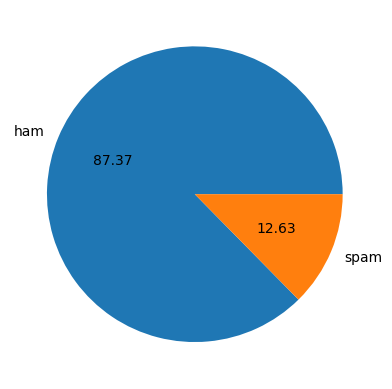

In [ ]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f") # taking care about ordering of labels
plt.show()  #imbalanced data

#IN CASE OF PROPER ORDERING OF LABELS :

# Getting the counts and their corresponding index (the unique values)
counts = spam['target'].value_counts()

ordered_categories = counts.index.tolist() # This will be [0, 1]

# Mapping the encoded values back to their original labels
original_labels = [encoder.classes_[i] for i in ordered_categories]

# Using original_labels in pie chart
plt.pie(counts, labels=original_labels, autopct="%0.2f")

plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
spam['num_char'] = spam['text'].apply(len)

/tmp/ipython-input-21-1980893186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_char'] = spam['text'].apply(len)


In [ ]:
spam

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-24-545784398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
spam['num_sentences'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-25-2166314420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_sentences'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
spam.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
spam[spam['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe() #for ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
spam[spam['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe() #for spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

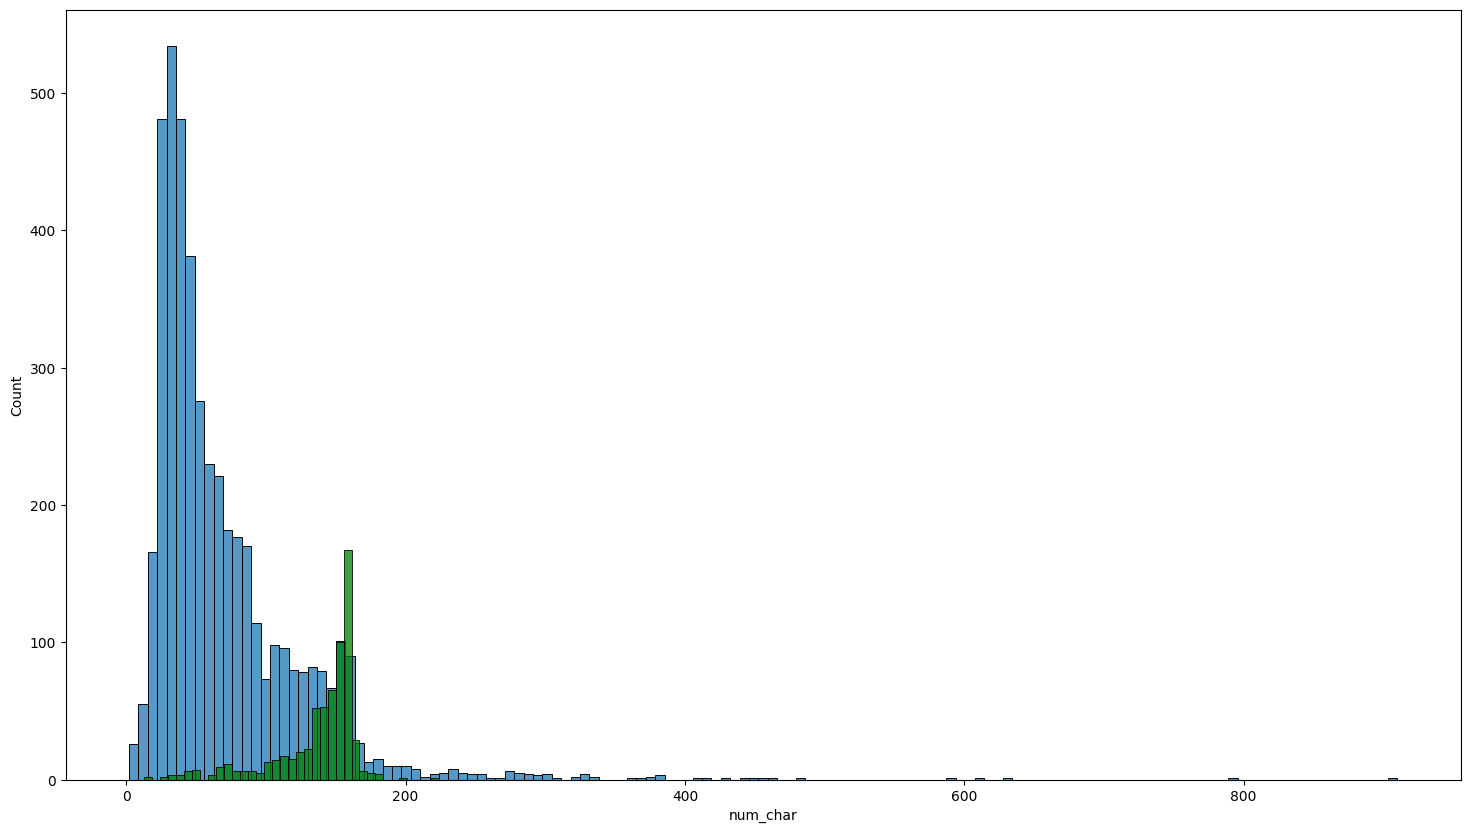

In [ ]:
plt.figure(figsize = (18, 10))
sns.histplot(spam[spam['target'] == 0]['num_char'])
sns.histplot(spam[spam['target'] == 1]['num_char'], color= 'green')

<Axes: xlabel='num_words', ylabel='Count'>

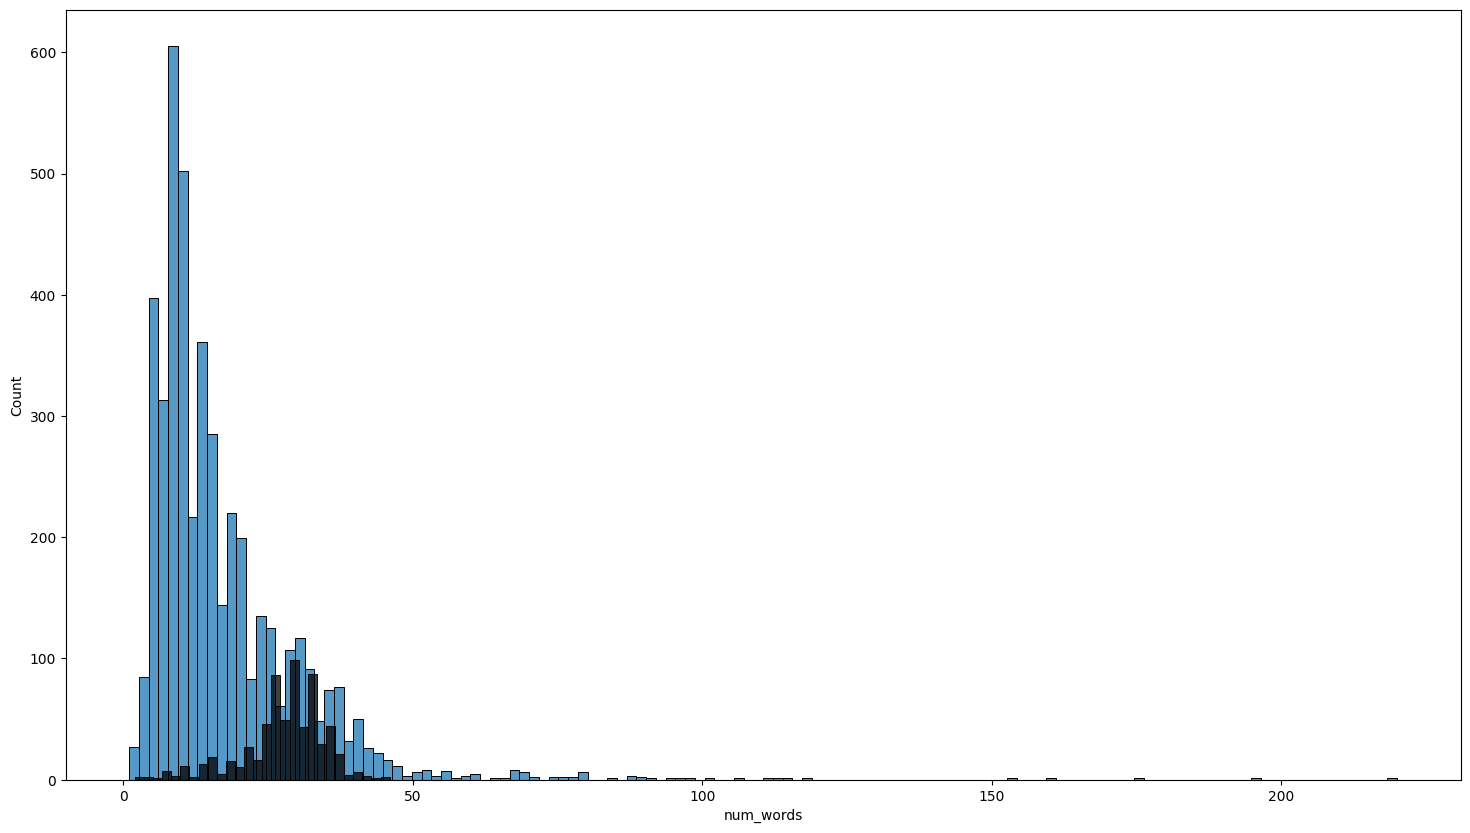

In [ ]:
plt.figure(figsize = (18, 10))
sns.histplot(spam[spam['target'] == 0]['num_words'])
sns.histplot(spam[spam['target'] == 1]['num_words'], color= 'black')

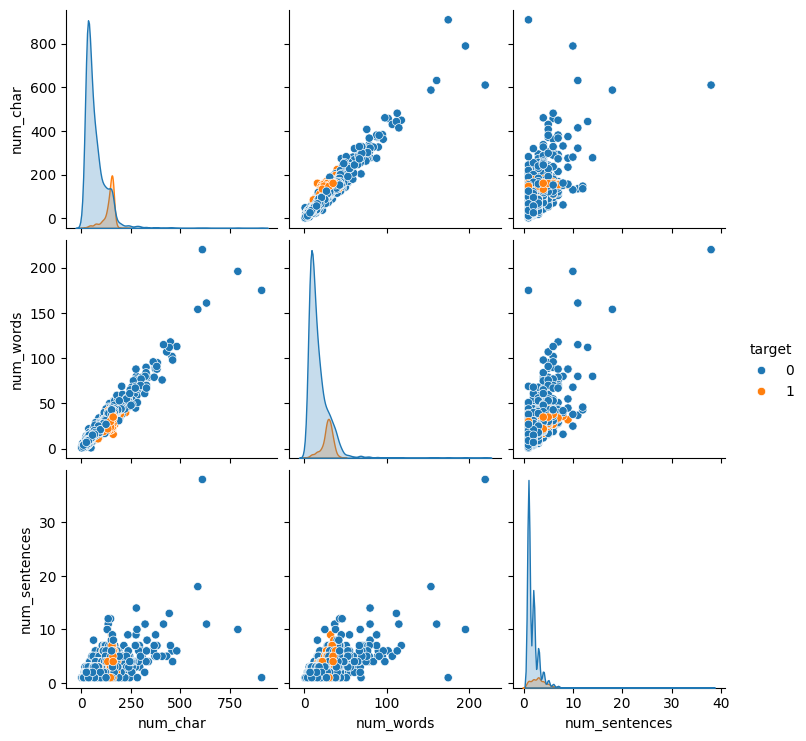

In [ ]:
sns.pairplot(spam, hue='target')

<Axes: >

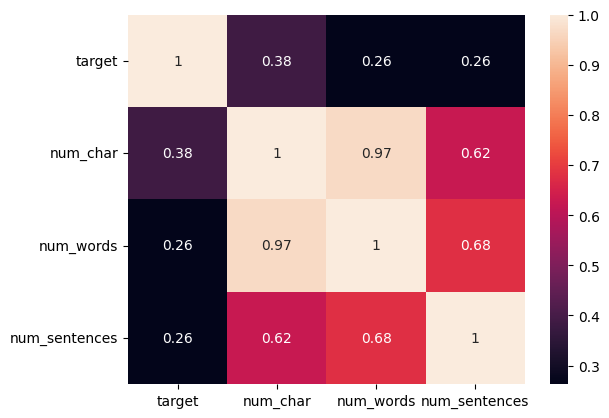

In [ ]:
sns.heatmap(spam.drop('text', axis=1).corr(),annot=True)

#DATA PREPROCESSING

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
spam['trans_text'] = spam['text'].apply(transform_text)

/tmp/ipython-input-39-2187311473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['trans_text'] = spam['text'].apply(transform_text)


In [ ]:
transform_text('Did you like my presentation on ML? ')

'like present ml'

In [ ]:
spam.head()

,target,text,num_char,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
ham_wc = wc.generate(spam[spam['target'] == 0]['trans_text'].str.cat(sep=' '))

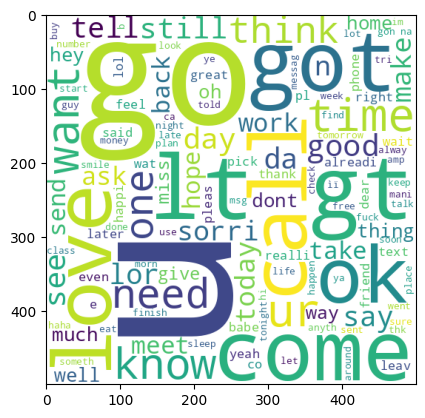

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_wc = wc.generate(spam[spam['target'] == 1]['trans_text'].str.cat(sep=' '))

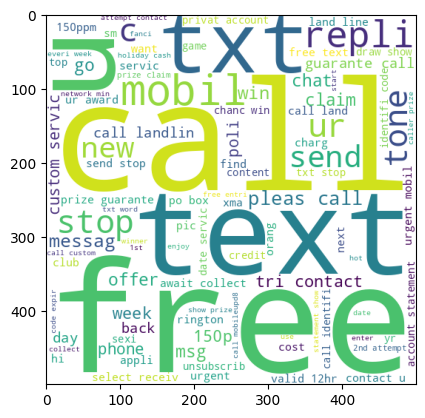

In [ ]:
plt.imshow(spam_wc)

In [ ]:
spam.head()

,target,text,num_char,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in spam[spam['target'] == 1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

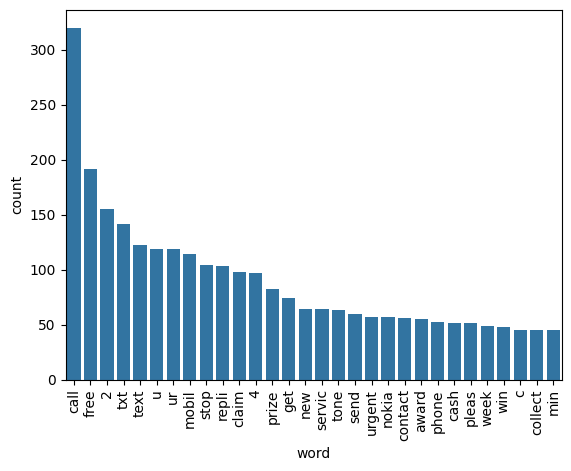

In [ ]:
from collections import Counter
word_counts_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in spam[spam['target'] == 0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

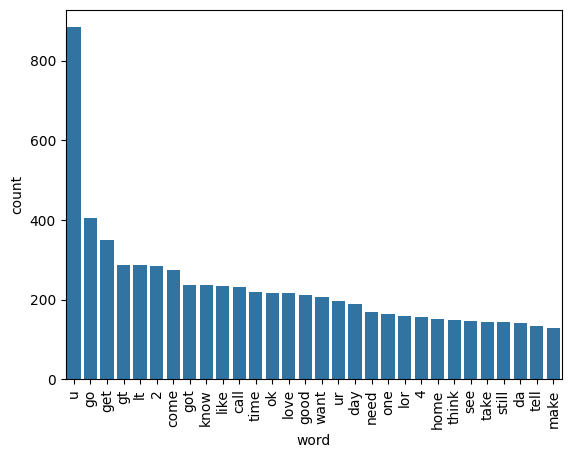

In [ ]:
from collections import Counter
word_counts_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

#MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# X = cv.fit_transform(spam['trans_text']).toarray()    {use any one(but tfidf preferable)}
X = tfidf.fit_transform(spam['trans_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = spam['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))   # in this case tfidf improves very much

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))